<a href="https://colab.research.google.com/github/Sir-Nate-01/Logistic-Regression-Fraud-Detection/blob/main/Logistic_Regression_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load your dataset
df = pd.read_excel("/content/drive/MyDrive/Thesis_Data.xlsx")

# Clean up the dataset
df.columns = df.columns.str.strip()

# Create the target variable
df['fraud_involvement'] = df['Have you ever been involved in a fraudulent claim?'].apply(lambda x: 1 if x == 'Yes (Ja)' else 0)

# Define features (these should match the columns in your dataset)
features = ['Age', 'Gender', 'Marital Status', 'Annual Income', 'Occupation',
            'Frequency of Claims in the last year', 'Total Claim Amount',
            'Amount paid by Insurance', 'Amount paid by patient', 'Previous Claims Amount',
            'Type of Service', 'Geographic Location', 'Insurance Company', 'Type of Insurance Policy',
            'Have you ever been asked to provide false information for a claim?',
            'Have you ever received any suspicious offers related to your insurance?']

# Encode categorical features
label_encoders = {}
for col in features:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Define the features (X) and the target variable (y)
X = df[features]
y = df['fraud_involvement']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#  Standardize the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# 9. Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Build and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 11.Make predictions on the test set
y_pred = logreg.predict(X_test)

# 12.Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# 13. Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg, X_resampled_scaled, y_resampled, cv=5, scoring='accuracy')

# 14. Output cross-validation results
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Cross-Validation Accuracy: {mean_cv_score}")
print(f"Standard Deviation of CV Scores: {std_cv_score}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Cross-Validation Accuracy: 1.0
Standard Deviation of CV Scores: 0.0


In [12]:
# Ensuring that the features are scaled using the same scaler as during training
X_scaled = scaler.transform(X_resampled)  # Use the same scaler

# Using the trained logistic regression model to predict on the same dataset
predictions_logreg = logreg.predict(X_scaled)  # Get predicted class labels (0 or 1)

# Optional: Get predicted probabilities for each class (fraud vs. non-fraud)
predicted_probabilities_logreg = logreg.predict_proba(X_scaled)  # Get probabilities for each class

# Output predictions
print("Logistic Regression Predictions for the dataset:")
print(predictions_logreg)

# Output predicted probabilities
print("Logistic Regression Predicted Probabilities for the dataset:")
print(predicted_probabilities_logreg)

Logistic Regression Predictions for the dataset:
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Logistic Regression Predicted Probabilities for the dataset:
[[9.97992813e-01 2.00718726e-03]
 [8.65356749e-01 1.34643251e-01]
 [9.98439380e-01 1.56062043e-03]
 [9.96553032e-01 3.44696820e-03]
 [9.91480121e-01 8.51987922e-03]
 [9.83146872e-01 1.68531275e-02]
 [9.66750795e-01 3.32492048e-02]
 [9.96419690e-01 3.58031046e-03]
 [5.66554662e-03 9.94334453e-01]
 [9.96692584e-01 3.30741612e-03]
 [9.83959893e-01 1.60401066e-02]
 [9.94850876e-01 5.14912375e-03]
 [9.76964843e-01 2.30351570e-02]
 [3.90146609e-02 9.60985339e-01]
 [9.89369529e-01 

In [13]:
# Comparing the predictions with the true labels (y_resampled or y_test)
accuracy = accuracy_score(y_resampled, predictions_logreg)
report = classification_report(y_resampled, predictions_logreg)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Logistic Regression Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       101

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202



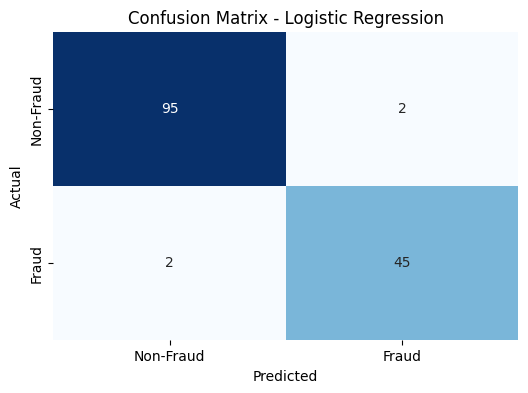

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming the actual and predicted classes from Logistic Regression
actual_classes = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                  1, 1, 1, 1]
predicted_classes = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                     0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1]

# Generate confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)

# Create a heatmap to show the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
